<a href="https://colab.research.google.com/github/KH4901/project-index/blob/main/%EC%94%A8%EC%95%A0%EB%9E%91%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%20%ED%99%94%EC%9D%B4%ED%8C%80%20%EC%BD%94%EC%9D%B8%EC%98%88%EC%B8%A1%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.15


In [2]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 20.9 MB/s 


In [3]:
import pyupbit

In [ ]:
!wget https://www.python.org/ftp/python/3.8.5/Python-3.8.5.tgz
!tar xvfz Python-3.8.5.tgz
!Python-3.8.5/configure
!make
!sudo make install

In [5]:
!python --version

Python 3.8.5


In [6]:
#BTC 최근 200시간의 데이터를 60분 단위로 불러옴
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute60")
df


,open,high,low,close,volume,value
2022-11-12 16:00:00,23301000.0,23354000.0,23213000.0,23286000.0,316.779965,7.382125e+09
2022-11-12 17:00:00,23296000.0,23453000.0,23247000.0,23387000.0,261.592983,6.110531e+09
2022-11-12 18:00:00,23387000.0,23491000.0,23340000.0,23423000.0,184.108123,4.311847e+09
2022-11-12 19:00:00,23423000.0,23530000.0,23354000.0,23384000.0,328.674653,7.702511e+09
2022-11-12 20:00:00,23383000.0,23414000.0,23326000.0,23389000.0,151.540851,3.541915e+09
...,...,...,...,...,...,...
2022-11-20 19:00:00,22959000.0,23049000.0,22942000.0,23040000.0,233.740173,5.377531e+09
2022-11-20 20:00:00,23022000.0,23064000.0,22875000.0,22962000.0,420.697519,9.667227e+09
2022-11-20 21:00:00,22965000.0,23002000.0,22885000.0,22896000.0,265.104497,6.079106e+09
2022-11-20 22:00:00,22890000.0,23012000.0,22890000.0,23010000.0,250.698757,5.754743e+09


In [7]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-11-12 16:00:00,23286000.0
1,2022-11-12 17:00:00,23387000.0
2,2022-11-12 18:00:00,23423000.0
3,2022-11-12 19:00:00,23384000.0
4,2022-11-12 20:00:00,23389000.0
...,...,...
195,2022-11-20 19:00:00,23040000.0
196,2022-11-20 20:00:00,22962000.0
197,2022-11-20 21:00:00,22896000.0
198,2022-11-20 22:00:00,23010000.0


In [8]:
pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [9]:
#prophet 불러옴 # 파이썬 3.9~ 부터는 지원이 안되어서 3.8~로 불러와야 함
from prophet import Prophet


In [10]:
#학습
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdx7vizgm/d94dntpb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdx7vizgm/gsnl9v5t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3021', 'data', 'file=/tmp/tmpdx7vizgm/d94dntpb.json', 'init=/tmp/tmpdx7vizgm/gsnl9v5t.json', 'output', 'file=/tmp/tmpdx7vizgm/prophet_modelv4yvdgd4/prophet_model-20221120141207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

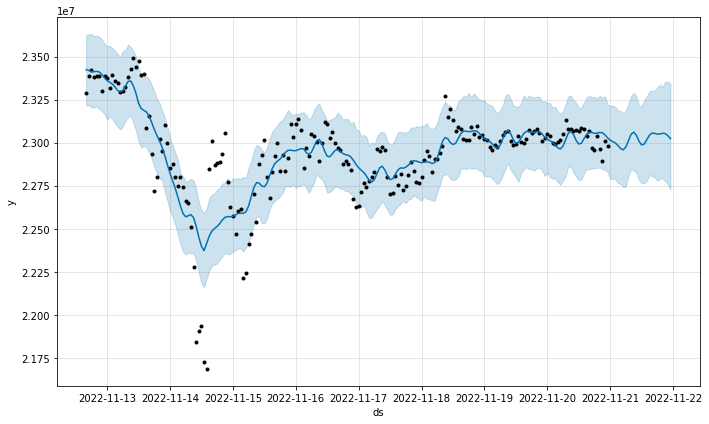

In [13]:
#그래프1
fig1 = model.plot(forecast)

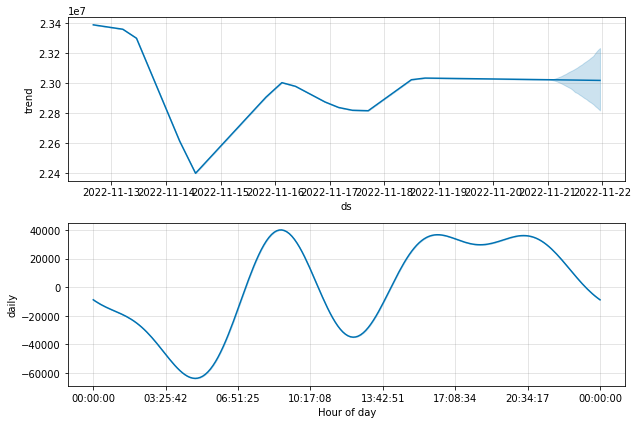

In [14]:
#그래프2
fig2 = model.plot_components(forecast)

In [15]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

22980000

In [16]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

23060984.412142098

In [17]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  22980000
종가의 가격:  23060984.412142098


In [ ]:
forecast

In [ ]:
#_________________________________________________ ETH_____________________________________

In [18]:
#BTC 최근 200시간의 데이터를 60분 단위로 불러옴
df2 = pyupbit.get_ohlcv("KRW-ETH", interval="minute60")
df2

,open,high,low,close,volume,value
2022-11-12 16:00:00,1755000.0,1767000.0,1752500.0,1756000.0,3463.143577,6.089535e+09
2022-11-12 17:00:00,1756000.0,1766000.0,1742500.0,1751000.0,4691.510117,8.226345e+09
2022-11-12 18:00:00,1752500.0,1763000.0,1750000.0,1755500.0,3795.514975,6.670793e+09
2022-11-12 19:00:00,1756500.0,1766500.0,1749000.0,1752000.0,3845.364711,6.753586e+09
2022-11-12 20:00:00,1752000.0,1755500.0,1744000.0,1752500.0,3266.449993,5.715063e+09
...,...,...,...,...,...,...
2022-11-20 19:00:00,1667500.0,1670000.0,1651500.0,1658000.0,2930.987154,4.873998e+09
2022-11-20 20:00:00,1658500.0,1659000.0,1617500.0,1625000.0,7482.508219,1.223008e+10
2022-11-20 21:00:00,1625000.0,1627000.0,1610000.0,1619000.0,5644.291635,9.141314e+09
2022-11-20 22:00:00,1619000.0,1635500.0,1617500.0,1635500.0,3174.072490,5.164714e+09


In [19]:
#시간(ds)와 종가(y)값만 남김
df2 = df2.reset_index()
df2['ds'] = df2['index']
df2['y'] = df2['close']
data2 = df2[['ds','y']]
data2

,ds,y
0,2022-11-12 16:00:00,1756000.0
1,2022-11-12 17:00:00,1751000.0
2,2022-11-12 18:00:00,1755500.0
3,2022-11-12 19:00:00,1752000.0
4,2022-11-12 20:00:00,1752500.0
...,...,...
195,2022-11-20 19:00:00,1658000.0
196,2022-11-20 20:00:00,1625000.0
197,2022-11-20 21:00:00,1619000.0
198,2022-11-20 22:00:00,1635500.0


In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [ ]:
#prophet 불러옴 # 파이썬 3.9~ 부터는 지원이 안되어서 3.8~로 불러와야 함
from prophet import Prophet

In [20]:
#학습
model2 = Prophet()
model2.fit(data2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdx7vizgm/u7oc3qws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdx7vizgm/jkk5qwyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30168', 'data', 'file=/tmp/tmpdx7vizgm/u7oc3qws.json', 'init=/tmp/tmpdx7vizgm/jkk5qwyd.json', 'output', 'file=/tmp/tmpdx7vizgm/prophet_modelx_1c1qbq/prophet_model-20221120141247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:12:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:12:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
#24시간 미래 예측
future2 = model2.make_future_dataframe(periods=24, freq='H')
forecast2 = model2.predict(future2)


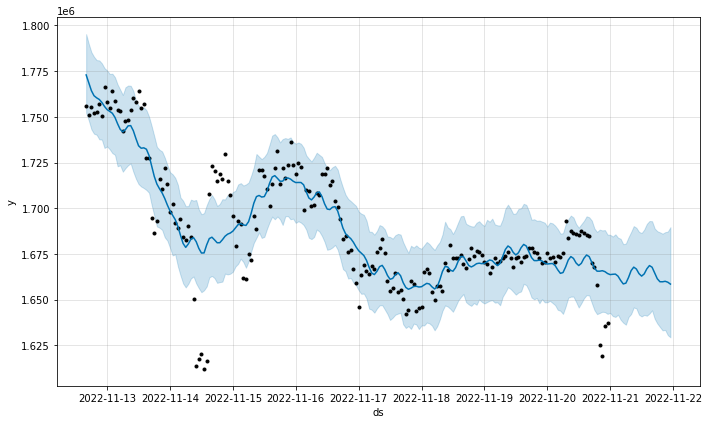

In [22]:
#그래프1
fig3 = model2.plot(forecast2)

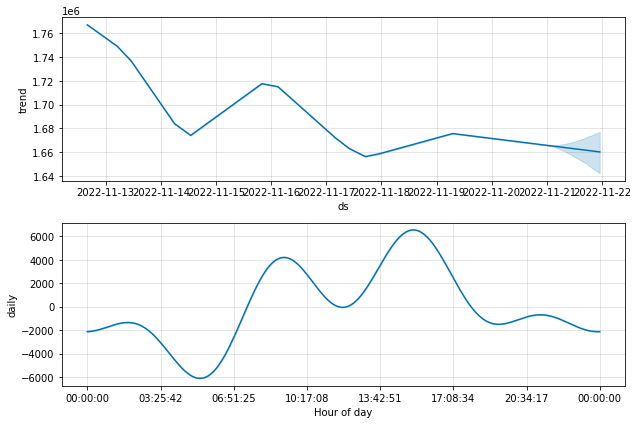

In [23]:
#그래프2
fig4 = model2.plot_components(forecast2)

In [24]:
#매수 시점의 가격
nowValue2 = pyupbit.get_current_price("KRW-ETH")
nowValue2

1636000

In [25]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf2 = forecast2[forecast2['ds'] == forecast2.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf2) == 0:
  closeDf2 = forecast2[forecast2['ds'] == data2.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue2 = closeDf2['yhat'].values[0]
closeValue2

1667772.7273779768

In [26]:
#구체적인 가격
print("현재 시점 가격: ", nowValue2)
print("종가의 가격: ", closeValue2)

현재 시점 가격:  1636000
종가의 가격:  1667772.7273779768


In [27]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-12 16:00:00,1.767171e+06,1.752225e+06,1.795263e+06,1.767171e+06,1.767171e+06,5780.170675,5780.170675,5780.170675,5780.170675,5780.170675,5780.170675,0.0,0.0,0.0,1.772951e+06
1,2022-11-12 17:00:00,1.765786e+06,1.748059e+06,1.789935e+06,1.765786e+06,1.765786e+06,2913.468877,2913.468877,2913.468877,2913.468877,2913.468877,2913.468877,0.0,0.0,0.0,1.768700e+06
2,2022-11-12 18:00:00,1.764401e+06,1.743163e+06,1.785379e+06,1.764401e+06,1.764401e+06,-70.864914,-70.864914,-70.864914,-70.864914,-70.864914,-70.864914,0.0,0.0,0.0,1.764330e+06
3,2022-11-12 19:00:00,1.763016e+06,1.740792e+06,1.782865e+06,1.763016e+06,1.763016e+06,-1448.756789,-1448.756789,-1448.756789,-1448.756789,-1448.756789,-1448.756789,0.0,0.0,0.0,1.761567e+06
4,2022-11-12 20:00:00,1.761631e+06,1.740227e+06,1.781070e+06,1.761631e+06,1.761631e+06,-1226.798057,-1226.798057,-1226.798057,-1226.798057,-1226.798057,-1226.798057,0.0,0.0,0.0,1.760404e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2022-11-21 19:00:00,1.661224e+06,1.635023e+06,1.686801e+06,1.647673e+06,1.673892e+06,-1448.756789,-1448.756789,-1448.756789,-1448.756789,-1448.756789,-1448.756789,0.0,0.0,0.0,1.659775e+06
220,2022-11-21 20:00:00,1.660983e+06,1.633156e+06,1.686073e+06,1.646189e+06,1.674669e+06,-1226.798057,-1226.798057,-1226.798057,-1226.798057,-1226.798057,-1226.798057,0.0,0.0,0.0,1.659756e+06
221,2022-11-21 21:00:00,1.660741e+06,1.633419e+06,1.686901e+06,1.644936e+06,1.675524e+06,-718.245970,-718.245970,-718.245970,-718.245970,-718.245970,-718.245970,0.0,0.0,0.0,1.660023e+06
222,2022-11-21 22:00:00,1.660500e+06,1.630577e+06,1.687222e+06,1.643664e+06,1.676296e+06,-973.018420,-973.018420,-973.018420,-973.018420,-973.018420,-973.018420,0.0,0.0,0.0,1.659527e+06
